# Teste Placa L

** Inicialização de Bibliotecas e configuração para o plot: **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('darkgrid')
%matplotlib inline

** Modificar a aparência dos Plots: **

In [2]:
params = {'font.size': 22, 
          'axes.edgecolor': 'black', 
          'axes.linewidth': 2, 
#          'ytick.color' : 'w',
#          'xtick.color' : 'w',
#          'axes.labelcolor' : 'w', 
#          'axes.edgecolor' : 'w', 
#          'text.color': 'w'
         }
plt.rcParams.update(params)  

** Nome dos Arquivos: **

In [3]:
frequencia1_cima_Z_name  = 'data/24M_cima_Z.xlsx'
frequencia1_baixo_Z_name = 'data/24M_baixo_Z.xlsx'

frequencia1_cima_H_name  = 'data/24M_cima_H.xlsx'
frequencia1_baixo_H_name = 'data/24M_baixo_H.xlsx'

frequencia2_cima_Z_name  = 'data/500k_cima_Z.xlsx'
frequencia2_baixo_Z_name = 'data/500k_baixo_Z.xlsx'

** Leitura dos Arquivos: **

In [4]:
names = ('A','B','C','D','E','F','G','H','I','J','K','L')
frequencia1_cima_Z   = pd.read_excel(frequencia1_cima_Z_name,   names=names, header=None)
frequencia1_baixo_Z  = pd.read_excel(frequencia1_baixo_Z_name,  names=names, header=None)

frequencia1_cima_H   = pd.read_excel(frequencia1_cima_H_name,   names=names, header=None)
frequencia1_baixo_H  = pd.read_excel(frequencia1_baixo_H_name,  names=names, header=None)

frequencia2_cima_Z   = pd.read_excel(frequencia2_cima_Z_name,   names=names, header=None)
frequencia2_baixo_Z  = pd.read_excel(frequencia2_baixo_Z_name,  names=names, header=None)

** Espelhamento das colunas de baixo: **

Necessário espelhar os dados de baixo para se ter a mesma visão superior com os dados de cima.

In [5]:
frequencia1_baixo_Z   = frequencia1_baixo_Z[frequencia1_baixo_Z.columns[::-1]]
frequencia1_baixo_H   = frequencia1_baixo_H[frequencia1_baixo_H.columns[::-1]]
frequencia2_baixo_Z  = frequencia2_baixo_Z[frequencia2_baixo_Z.columns[::-1]]

** Definição das funções: **

A função `plot_heatmap` faz a plotagem em si do dataframe passado. E para plotar vários dataframes com a mesma escala pode-se utilizar a função wrapper `plot_heatmaps`, colocando quantos dataframes quiser na ordem de argumentos: dataframe e título do plot. Por exemplo: plot_heatmaps(dataframe_1, 'Título_1', dataframe_2, 'Título_2', ...)

In [6]:
def plot_heatmap(data, title, vmax, vmin):
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,1.5,1.5])
    im = ax.imshow(data.values, interpolation='gaussian', cmap='inferno', origin='upper', 
                   extent=[0, 12, 12, 0], vmax=vmax, vmin=vmin)
    plt.title(title)
    plt.xticks(np.arange(0,13,2),names[::2])
    
    rect = patches.Rectangle(chanfro[:2],chanfro[2],chanfro[3],linewidth=6,edgecolor='w',facecolor='none')
    ax.add_patch(rect)
    rect = patches.Rectangle((1,1),10,10,linewidth=6,edgecolor='w',facecolor='none')
    ax.add_patch(rect)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()
    
def plot_heatmaps(*args):
    dfs = args[::2]
    titles = args[1::2]
    vmax = max(df.values.max() for df in dfs)
    vmin = min(df.values.min() for df in dfs)
    for df, title in zip(dfs, titles):
        plot_heatmap(df, title, vmax, vmin)

** Desenho do Chanfro: **

Para as placas que possuem Chanfro especifica-se abaixo dimensão do chanfro seguindo o padrão: (Posição_inicial_X, Posição_inicial_Y, Largura, Altura).

In [7]:
chanfro = (5.5,2,1,9)

** Plotagem: **

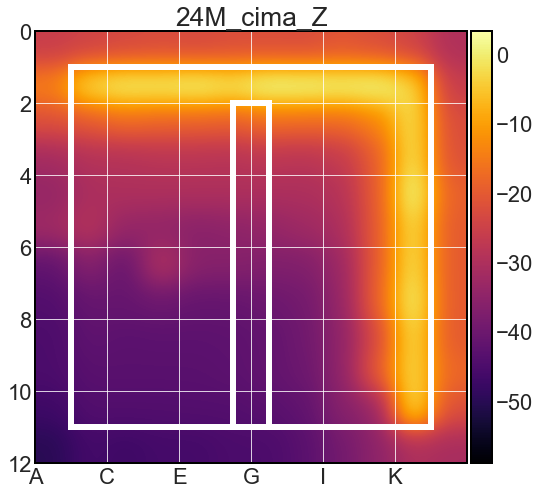

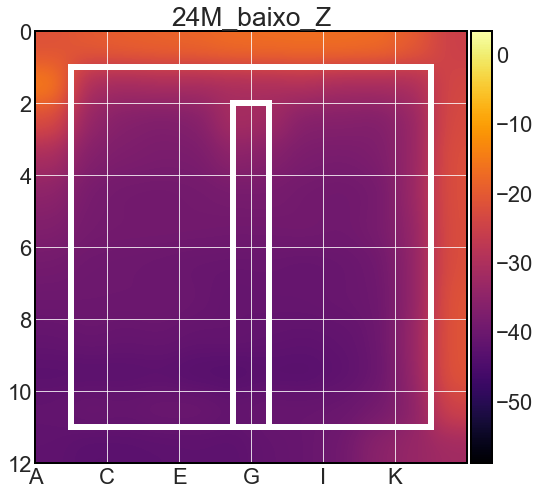

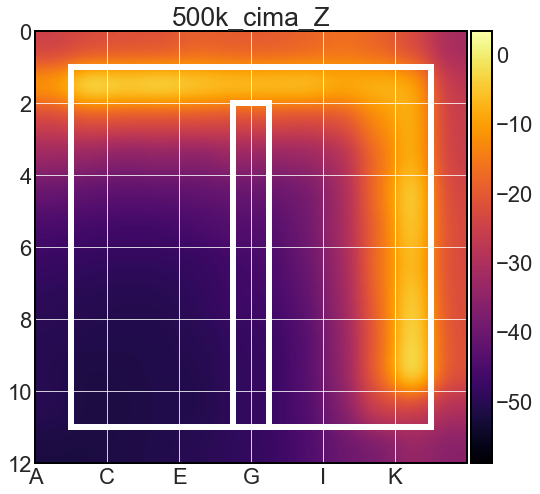

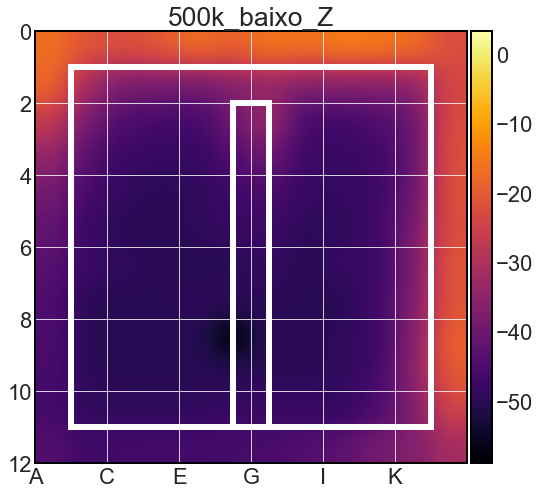

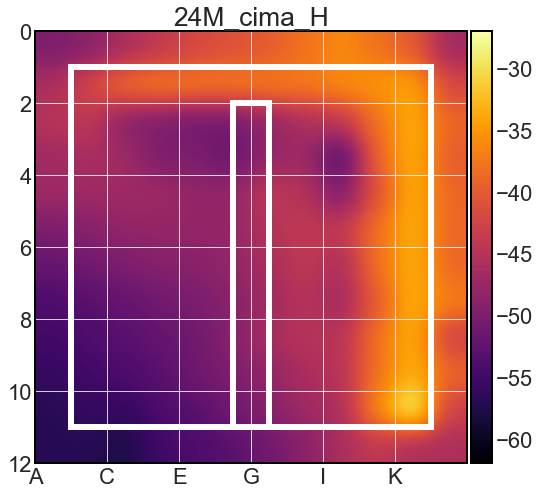

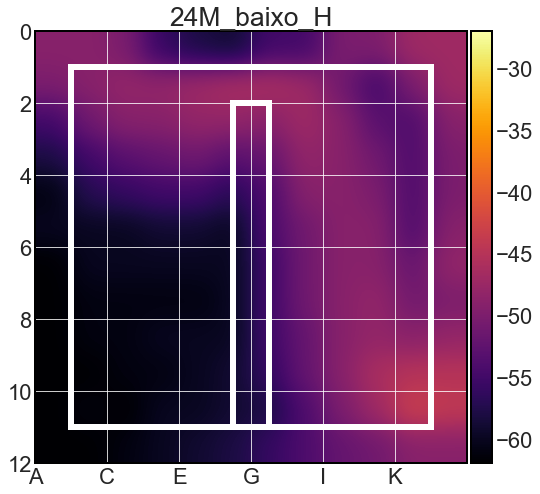

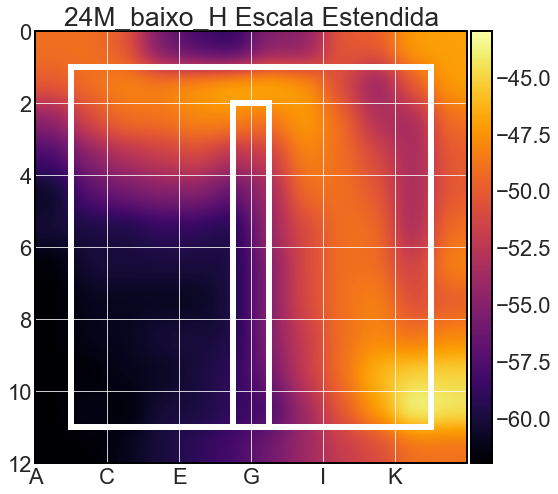

In [8]:
plot_heatmaps(frequencia1_cima_Z,'24M_cima_Z',
               frequencia1_baixo_Z,'24M_baixo_Z',
               frequencia2_cima_Z,'500k_cima_Z',
               frequencia2_baixo_Z,'500k_baixo_Z')
plot_heatmaps(frequencia1_cima_H,'24M_cima_H',frequencia1_baixo_H,'24M_baixo_H')
plot_heatmaps(frequencia1_baixo_H,'24M_baixo_H Escala Estendida')